## 🏪 Introduction

This project focuses on analyzing Zilo’s e-commerce sales data to uncover valuable business insights and patterns that can support data-driven decision-making.
Zilo is a Mumbai-based fashion brand offering men’s, women’s, and kids’ apparel with ultra-fast delivery services ranging from 60 minutes to 1 day.

The main goal of this analysis is to understand how different factors — such as product category, pricing, region, and payment methods — influence sales performance and customer behavior.
Through data cleaning, preprocessing, and exploratory data analysis (EDA), we aim to identify key trends, correlations, and improvement areas that can help Zilo enhance its marketing, inventory, and pricing strategies.

## 🎯 Objectives

- Clean and prepare raw datasets for accurate analysis.<br>
- Perform EDA to uncover trends and patterns in sales data.<br>
- Analyze top-performing categories, regions, and products.<br>
- Generate actionable insights for customer engagement and profitability.<br>
- Prepare the data for visualization in Power BI Dashboard.

In [39]:
# Importing required libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading and Getting a Glimpse of the Dataset
The dataset available is in .csv format, so I will load the dataset in csv format to start data analysis.

In [40]:
products = pd.read_csv("products_catalog.csv")
orders = pd.read_csv("orders_synthetic.csv" )

In [41]:
products.head(5)                 # exploring first five variables to identify anamolies in the data

,product_id,product_name,brand,category,price_mrp,price_sale,discount_pct,product_url,image_url,availability_note,pincodes_available,scrape_date
0,P1000,Outzidr Comfort T-Shirt 1,Outzidr,T-Shirts,1199,899,25,https://www.zilo.one/products/p1000,https://cdn.zilo.one/images/P1000.jpg,Delivery: 60 mins (select pincodes),400018|400003|400014|400002|400001|400017,2025-10-04
1,P1001,Puma Summer Footwear 2,Puma,Footwear,3499,3149,10,https://www.zilo.one/products/p1001,https://cdn.zilo.one/images/P1001.jpg,Delivery: Same day (select pincodes),400018|400014|400008|400015|400009|400013|4000...,2025-10-04
2,P1002,Janasya Striped Innerwear 3,Janasya,Innerwear,1799,1529,15,https://www.zilo.one/products/p1002,https://cdn.zilo.one/images/P1002.jpg,Delivery: 60 mins (select pincodes),400012|400020|400009|400002|400015|400018,2025-10-04
3,P1003,Roadster Black T-Shirt 4,Roadster,T-Shirts,2999,2099,30,https://www.zilo.one/products/p1003,https://cdn.zilo.one/images/P1003.jpg,Delivery: 3 hours,400012|400019|400007|400003|400002|400011|4000...,2025-10-04
4,P1004,Antheaa Sport Footwear 5,Antheaa,Footwear,1499,824,45,https://www.zilo.one/products/p1004,https://cdn.zilo.one/images/P1004.jpg,Delivery: Same day (select pincodes),400006|400012|400019|400007|400009|400018|4000...,2025-10-04


In [42]:
orders.head(5)                     # exploring first five variables to identify anamolies in the data

,order_id,order_ts,product_id,quantity,unit_price,order_value,pincode,delivery_hours,on_time,is_returned,order_status
0,ORD100000,2025-10-03 11:17:39,P1002,1,1529.0,1529.0,400018,2.5,1,0,delivered
1,ORD100001,2025-09-20 15:03:47,P1020,1,359.0,359.0,400017,0.2,1,0,delivered
2,ORD100002,2025-09-23 16:32:56,P1038,1,539.0,539.0,400002,2.4,1,0,delivered
3,ORD100003,2025-10-01 04:58:54,P1007,1,2099.0,2099.0,400004,1.7,1,0,delivered
4,ORD100004,2025-09-02 07:25:05,P1012,1,1599.0,1599.0,400001,0.9,1,0,delivered


In [43]:
products.shape                              # Returns the number of rows and columns.

(40, 12)

In [44]:
orders.shape

(3000, 11)

In [45]:
products.info()                  # Checking the data types of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          40 non-null     object
 1   product_name        40 non-null     object
 2   brand               40 non-null     object
 3   category            40 non-null     object
 4   price_mrp           40 non-null     int64 
 5   price_sale          40 non-null     int64 
 6   discount_pct        40 non-null     int64 
 7   product_url         40 non-null     object
 8   image_url           40 non-null     object
 9   availability_note   40 non-null     object
 10  pincodes_available  40 non-null     object
 11  scrape_date         40 non-null     object
dtypes: int64(3), object(9)
memory usage: 3.9+ KB


In [46]:
orders.info()                  # Checking the data types of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        3000 non-null   object 
 1   order_ts        3000 non-null   object 
 2   product_id      3000 non-null   object 
 3   quantity        3000 non-null   int64  
 4   unit_price      3000 non-null   float64
 5   order_value     3000 non-null   float64
 6   pincode         3000 non-null   int64  
 7   delivery_hours  3000 non-null   float64
 8   on_time         3000 non-null   int64  
 9   is_returned     3000 non-null   int64  
 10  order_status    3000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 257.9+ KB


In [47]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
price_mrp,40.0,2096.500,1194.536172,799.0,999.00,1649.0,2999.0,4499.0
price_sale,40.0,1398.625,801.505305,359.0,764.00,1266.5,2099.0,3399.0
discount_pct,40.0,32.125,15.806827,10.0,18.75,30.0,45.0,60.0


In [48]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,3000.0,1.227000,0.479111,1.0,1.0,1.0,1.0,3.0
unit_price,3000.0,1402.845000,825.222579,359.0,764.0,1274.0,1799.0,3399.0
order_value,3000.0,1728.099667,1317.957678,359.0,764.0,1529.0,2099.0,9447.0
pincode,3000.0,400010.586667,5.811117,400001.0,400005.0,400011.0,400016.0,400020.0
delivery_hours,3000.0,7.774833,13.870841,0.2,1.3,2.7,5.5,95.7
on_time,3000.0,0.895667,0.305743,0.0,1.0,1.0,1.0,1.0
is_returned,3000.0,0.047667,0.213095,0.0,0.0,0.0,0.0,1.0


In [49]:
# checking total number of missing values in each feature
products.isnull().sum().sort_values(ascending= False)

product_id            0
product_name          0
brand                 0
category              0
price_mrp             0
price_sale            0
discount_pct          0
product_url           0
image_url             0
availability_note     0
pincodes_available    0
scrape_date           0
dtype: int64

In [50]:
# checking total number of missing values in each feature
orders.isnull().sum().sort_values(ascending= False)

order_id          0
order_ts          0
product_id        0
quantity          0
unit_price        0
order_value       0
pincode           0
delivery_hours    0
on_time           0
is_returned       0
order_status      0
dtype: int64

In [51]:
# Convert to datetime
orders['order_ts'] = pd.to_datetime(orders['order_ts'])
# Derived columns
orders['order_date'] = orders['order_ts'].dt.date
orders['order_hour'] = orders['order_ts'].dt.hour
orders['order_dow'] = orders['order_ts'].dt.day_name()

# Quick null checks
print('Orders nulls:')
print(orders.isnull().sum())

orders.head(6)

Orders nulls:
order_id          0
order_ts          0
product_id        0
quantity          0
unit_price        0
order_value       0
pincode           0
delivery_hours    0
on_time           0
is_returned       0
order_status      0
order_date        0
order_hour        0
order_dow         0
dtype: int64


,order_id,order_ts,product_id,quantity,unit_price,order_value,pincode,delivery_hours,on_time,is_returned,order_status,order_date,order_hour,order_dow
0,ORD100000,2025-10-03 11:17:39,P1002,1,1529.0,1529.0,400018,2.5,1,0,delivered,2025-10-03,11,Friday
1,ORD100001,2025-09-20 15:03:47,P1020,1,359.0,359.0,400017,0.2,1,0,delivered,2025-09-20,15,Saturday
2,ORD100002,2025-09-23 16:32:56,P1038,1,539.0,539.0,400002,2.4,1,0,delivered,2025-09-23,16,Tuesday
3,ORD100003,2025-10-01 04:58:54,P1007,1,2099.0,2099.0,400004,1.7,1,0,delivered,2025-10-01,4,Wednesday
4,ORD100004,2025-09-02 07:25:05,P1012,1,1599.0,1599.0,400001,0.9,1,0,delivered,2025-09-02,7,Tuesday
5,ORD100005,2025-09-29 17:36:18,P1021,1,1624.0,1624.0,400007,57.1,0,0,delivered,2025-09-29,17,Monday


In [52]:
# KPI calculations
kpis = {
    'total_orders': len(orders),
    'total_revenue': orders['order_value'].sum(),
    'avg_delivery_hours': orders['delivery_hours'].mean(),
    'on_time_pct': orders['on_time'].mean() * 100,
    'return_rate_pct': orders['is_returned'].mean() * 100,
    'AOV': orders['order_value'].mean()
}


import pprint
pprint.pprint(kpis)


{'AOV': np.float64(1728.0996666666667),
 'avg_delivery_hours': np.float64(7.7748333333333335),
 'on_time_pct': np.float64(89.56666666666668),
 'return_rate_pct': np.float64(4.766666666666667),
 'total_orders': 3000,
 'total_revenue': np.float64(5184299.0)}


In [53]:
# Top products by revenue
top_products = (
    orders.groupby('product_id')
    .agg(total_revenue=('order_value','sum'), orders=('order_id','count'))
    .reset_index()
    .merge(products[['product_id','product_name','brand']], on='product_id', how='left')
    .sort_values('total_revenue', ascending=False)
)

top_products.head(12)

,product_id,total_revenue,orders,product_name,brand
1,P1001,973041.0,246,Puma Summer Footwear 2,Puma
33,P1033,450177.0,225,H&M Striped Jacket 34,H&M
7,P1007,426097.0,176,W Sport Innerwear 8,W
28,P1028,365878.0,90,Puma Casual Footwear 29,Puma
12,P1012,361374.0,185,GIVA Sport Footwear 13,GIVA
11,P1011,275804.0,286,Puma Winter Dresse 12,Puma
9,P1009,222261.0,112,Antheaa Comfort Bottom 10,Antheaa
34,P1034,219234.0,287,Janasya Casual Footwear 35,Janasya
2,P1002,185009.0,97,Janasya Striped Innerwear 3,Janasya
3,P1003,167920.0,63,Roadster Black T-Shirt 4,Roadster


In [54]:
# Pincode summary: orders, revenue, avg delivery, on-time %
pincode_summary = (
    orders.groupby('pincode')
    .agg(orders=('order_id','count'), revenue=('order_value','sum'), avg_delivery=('delivery_hours','mean'), on_time_pct=('on_time', 'mean'))
    .reset_index()
    .sort_values('orders', ascending=False)
)

# convert on_time_pct to percentage
pincode_summary['on_time_pct'] = pincode_summary['on_time_pct'] * 100

pincode_summary.head(12)

,pincode,orders,revenue,avg_delivery,on_time_pct
17,400018,208,402622.0,5.455288,94.711538
14,400015,206,332300.0,8.145631,89.805825
3,400004,202,298707.0,7.867327,89.108911
16,400017,188,299078.0,7.195745,90.957447
10,400011,184,315301.0,8.356522,88.586957
2,400003,178,351690.0,11.272472,80.337079
1,400002,163,259733.0,3.890798,95.705521
8,400009,151,310878.0,3.895364,98.013245
6,400007,150,235292.0,11.752000,82.666667
12,400013,142,252451.0,12.799296,78.873239


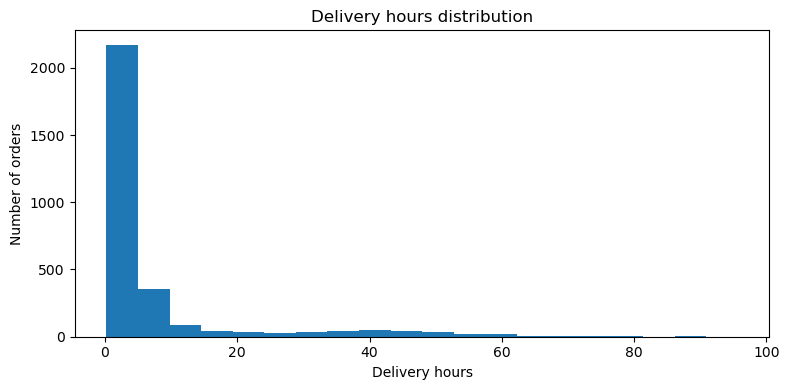

In [55]:
plt.figure(figsize=(8,4))
plt.hist(orders['delivery_hours'].dropna(), bins=20)
plt.title('Delivery hours distribution')
plt.xlabel('Delivery hours')
plt.ylabel('Number of orders')
plt.tight_layout()
plt.show()


In [56]:
# Return rates by product
return_stats = (
    orders.groupby('product_id')
    .agg(orders=('order_id','count'), returns=('is_returned','sum'))
    .reset_index()
)
return_stats['return_rate_pct'] = (return_stats['returns'] / return_stats['orders']) * 100
return_stats = return_stats.merge(products[['product_id','product_name','brand','category']], on='product_id', how='left')
return_stats.sort_values('return_rate_pct', ascending=False).head(12)


,product_id,orders,returns,return_rate_pct,product_name,brand,category
5,P1005,12,2,16.666667,W Floral T-Shirt 6,W,T-Shirts
4,P1004,15,2,13.333333,Antheaa Sport Footwear 5,Antheaa,Footwear
37,P1037,8,1,12.500000,Puma Comfort Jacket 38,Puma,Jackets
19,P1019,35,4,11.428571,Nike Summer Jacket 20,Nike,Jackets
28,P1028,90,10,11.111111,Puma Casual Footwear 29,Puma,Footwear
17,P1017,74,6,8.108108,Janasya Sport Footwear 18,Janasya,Footwear
24,P1024,52,4,7.692308,GIVA Casual Jacket 25,GIVA,Jackets
18,P1018,53,4,7.547170,Roadster Summer Innerwear 19,Roadster,Innerwear
8,P1008,100,7,7.000000,Roadster Winter Accessorie 9,Roadster,Accessories
1,P1001,246,16,6.504065,Puma Summer Footwear 2,Puma,Footwear


In [60]:
orders.to_csv('C:/Users/Nishi/Documents/Zilo_Project/orders_clean.csv', index=False)
products.to_csv('C:/Users/Nishi/Documents/Zilo_Project/products_clean.csv', index=False)
top_products.head(200).to_csv('C:/Users/Nishi/Documents/Zilo_Project/top_products_by_revenue.csv', index=False)
pincode_summary.to_csv('C:/Users/Nishi/Documents/Zilo_Project/pincode_summary.csv', index=False)


